In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
folder = "/Users/julius/Library/CloudStorage/GoogleDrive-juliusjacobitz@gmail.com/My Drive/Studium/Master/07_Semester_Leuven/Genetic Algorithms/CodeGroupPhase/src/data/output_julius/"

In [3]:
tour= "50"
folder = folder + tour + "/"
filepaths = [folder + i for i in os.listdir(folder) if i.endswith(".csv")]

# shuffle filepaths
np.random.shuffle(filepaths)


## Read Data

In [4]:
data = []
for fp in filepaths:
    df = pd.read_csv(fp,skiprows=2,header=None)
    df = df.drop(columns=[54])
    cols_to_merge = df.columns[4:54]  # Python slices are exclusive on the end

    # Merge cycle columns into a single list column
    df["Cycle"] = df[cols_to_merge].apply(
        lambda row: [x for x in row if pd.notna(x) and np.issubdtype(type(x), np.number)],
        axis=1
    )
    df = df.drop(columns=cols_to_merge)
    df.columns = ["# Iteration", "Elapsed time", "Mean value", "Best value", "Cycle"]
    data.append(df.copy())


print("len(data): ", len(data))

len(data):  100


## variation of best solutionss

In [5]:
best_values = [df.tail(1)["Best value"].values[0] for df in data]
np_best_values = np.array(best_values)
print("Best values over all runs: ")
print("Mean: ", round(np.mean(np_best_values),4))
print("Std: ", round(np.std(np_best_values), 4))
print("Min: ", round(np.min(np_best_values), 4))
print("Max: ", round(np.max(np_best_values), 4))

Best values over all runs: 
Mean:  14110.6436
Std:  179.1714
Min:  13844.3383
Max:  14898.4731


## find best run

In [6]:
# find index of np_best_values with min value
best_run_index = np.argmin(np_best_values)
print("Best run index: ", best_run_index)
filepaths[best_run_index].split("/")[-1]

Best run index:  35


'tour_50_seed93_1761653099.csv'

## plots


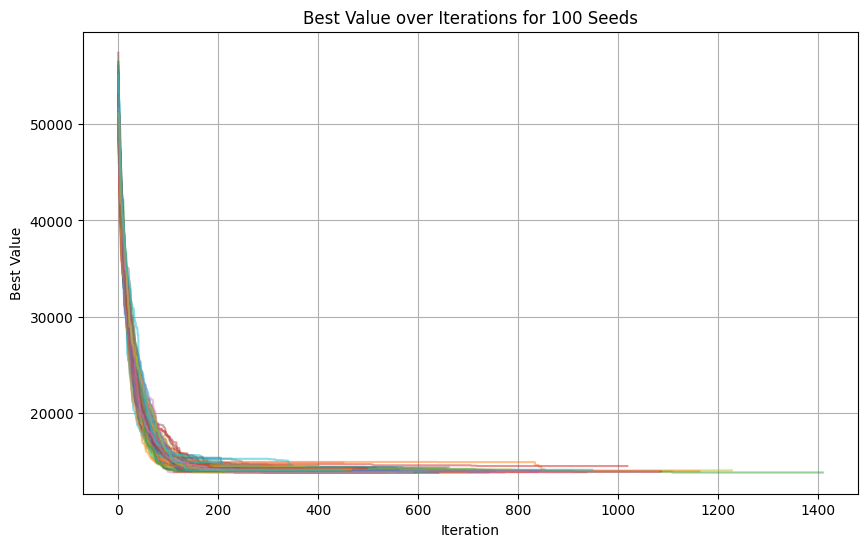

In [7]:
plt.figure(figsize=(10, 6))
for i, df in enumerate(data):
    plt.plot(df["# Iteration"], df["Best value"], label=f'Run {i+1}', alpha=0.5)
plt.xlabel('Iteration')
plt.ylabel('Best Value')
plt.title('Best Value over Iterations for 100 Seeds')
plt.grid()
plt.savefig('best_value_over_iterations.png',dpi=300)
plt.show()


## Histogram

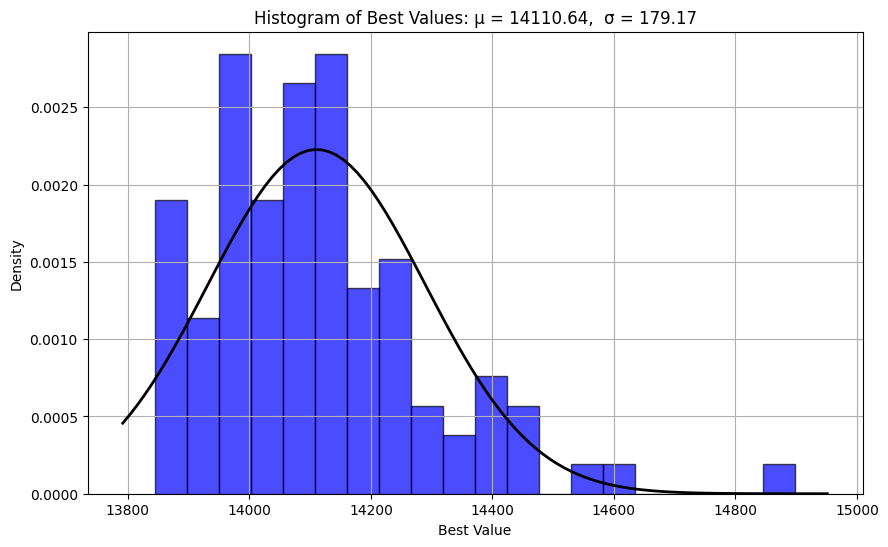

In [8]:
# plot best values as histogram
# and add gaus fit
plt.figure(figsize=(10, 6))
plt.hist(best_values, bins=20, alpha=0.7, color='blue', edgecolor='black', density=True)
mu, std = np.mean(best_values), np.std(best_values)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - mu) / std) ** 2) / (std * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)
title = f"Histogram of Best Values: μ = {mu:.2f},  σ = {std:.2f}"
plt.title(title)
plt.xlabel('Best Value')
plt.ylabel('Density')
plt.grid()
plt.savefig('histogram_best_values.png',dpi=300)
plt.show()

